# Artifact Removal Lab

In [14]:
from uuid import uuid4
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from bcd.preprocess.image.convert import ImageConverter, ImageConverterParams
from bcd.core.orchestration.task import Task
from bcd.config import Config
from bcd.container import BCDContainer

In [7]:
IMAGE_DIR = "data/image/1_dev"

In [2]:
Config.set_mode(mode='dev')
Config.set_log_level(log_level='INFO')

In [3]:
container = BCDContainer()
container.init_resources()
container.wire(
    packages=[
        "bcd.preprocess.image",        
    ]
)

## Load Images

In [5]:

# params = ImageConverterParams(frac=0.02)
# task = Task.create(method=ImageConverter, params=params)
# task.job_id = str(uuid4())
# task.run()

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████| 69/69 [01:01<00:00,  1.12it/s]


## Select an Image

255

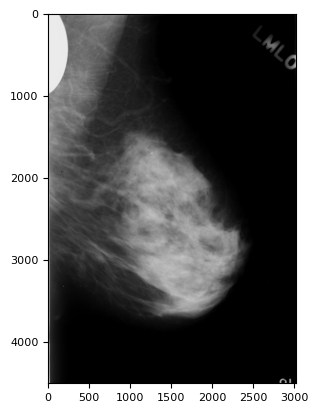

In [24]:
images = os.listdir(IMAGE_DIR)
filename = np.random.choice(a=images, size=1)
filepath = os.path.join(IMAGE_DIR,filename[0])
image = cv2.imread(filepath)
plt.imshow(image)
np.max(image, axis=None)




## Convert to Gray

255

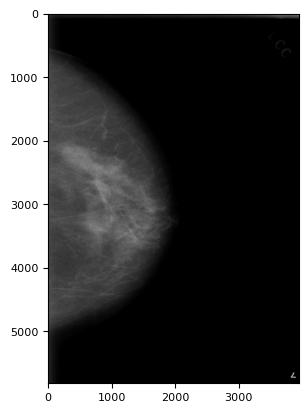

In [20]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
np.max(img_gray, axis=None)